# PROYEK SAINS DATA PREDIKSI EMISI CO2 PER TAHUN NEGARA INDONESIA BERDASARKAN POLA WAKTU


# Bisnis Understanding


## 1. Pendahuluan


Perubahan iklim merupakan isu global yang semakin mendesak, di mana gas rumah kaca seperti karbon dioksida (CO2) berperan sebagai penyebab utama pemanasan global. Indonesia, yang merupakan salah satu negara dengan jumlah penduduk terbanyak dan pertumbuhan ekonomi cepat di Asia Tenggara, memainkan peran penting dalam emisi CO2 secara global. Penyebab utama emisi CO2 di Indonesia berasal dari sektor energi, transportasi, dan pembakaran lahan. Mengacu pada signifikansi peran Indonesia di kancah internasional, pengawasan dan pengelolaan emisi CO2 sangat krusial untuk mendukung tindakan mitigasi perubahan iklim.

Perlu dicatat bahwa emisi CO2 di Indonesia menunjukkan variasi tahunan yang dipengaruhi oleh faktor musiman, perubahan ekonomi, serta kebijakan pemerintah yang diterapkan di berbagai sektor. Oleh karena itu, perlu diadakan analisis untuk memahami pola perubahan emisi CO2 dalam jangka waktu tertentu, yang dapat dimanfaatkan untuk memprediksi tren emisi di masa depan.

Namun, untuk meramalkan emisi CO2 di Indonesia, metode yang umumnya dipakai adalah model univariate, yang hanya bergantung pada data historis emisi CO2 itu sendiri sebagai variabel utama. Pendekatan ini memungkinkan pengenalan pola atau tren yang ada tanpa mempertimbangkan variabel eksternal lainnya, seperti kondisi ekonomi atau kebijakan pemerintah, yang meskipun krusial, sering kali sukar untuk diprediksi secara tepat.

Emisi CO2 dalam pendekatan univariate ini akan dianalisis melalui pola waktu (time series), yang bertujuan untuk mengidentifikasi pola tahunan atau musiman dalam emisi CO2. Model ini tidak secara langsung memperhitungkan faktor eksternal, tetapi mampu mengidentifikasi pola dan tren yang ada dalam data historis CO2, sehingga dapat dimanfaatkan untuk memprediksi emisi CO2 di tahun-tahun yang akan datang.


## 2. Tujuan Analisis


Proyek ini bertujuan untuk membangun model prediksi univariate yang mampu meramalkan tingkat emisi CO2 per tahun di Indonesia berdasarkan data historis emisi CO2 itu sendiri. Model ini akan mengidentifikasi pola waktu yang ada dalam data emisi CO2 dan menggunakannya untuk membuat proyeksi ke depan, membantu perencanaan kebijakan lingkungan yang lebih efisien dan berbasis data. Selain itu, tujuan lainnya adalah untuk:


- Menyediakan prediksi tahunan emisi CO2 yang lebih akurat berdasarkan data historis yang tersedia.
- Membantu pihak terkait dalam merancang strategi mitigasi perubahan iklim yang lebih tepat dan berbasis pada data.


Dengan pendekatan univariate ini, proyek diharapkan dapat memberikan kontribusi dalam pengembangan sistem prediksi emisi CO2 yang lebih efisien, sehingga lebih efektif dalam memantau dan mengurangi dampak perubahan iklim.


Data yang akan dipakai adalah data emisi co2 per kapita negara indonesia dari tahun 1889 sampai 2023
yang diambil dari Website Our World in data https://ourworldindata.org/co2/country/indonesia yang dimana data diambil dalam satuan TON


# Data Understanding


## Read Data


Disini saya mengambil data yang sudah saya download dalam bentuk csv dan memasukkannya kedalam dataframe


In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

data = pd.read_csv('./owid-co2-data.csv')

indonesia_data = data[data['country'] == 'Indonesia']

indonesia_co2 = indonesia_data[['year', 'co2']]
df_main = indonesia_co2.sort_values('year').reset_index(drop=True)

df_main

,year,co2
0,1889,0.004
1,1890,0.015
2,1891,0.022
3,1892,0.191
4,1893,0.403
...,...,...
127,2016,560.846
128,2017,575.176
129,2018,614.884
130,2019,660.594


## Data overview


In [ ]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    132 non-null    int64  
 1   co2     132 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


In [4]:
df_main.describe()

,year,co2
count,132.000000,132.000000
mean,1954.500000,109.090576
std,38.249183,166.777145
min,1889.000000,0.004000
25%,1921.750000,7.511250
50%,1954.500000,22.393000
75%,1987.250000,125.827000
max,2020.000000,660.594000


pada data saya ini terdapat 2 kolom fitur yaitu year dan co2 dengan data numerik

- year (dalam tahun)
- co2 (dalam ton)


saya akan coba melihat pola pada dataset


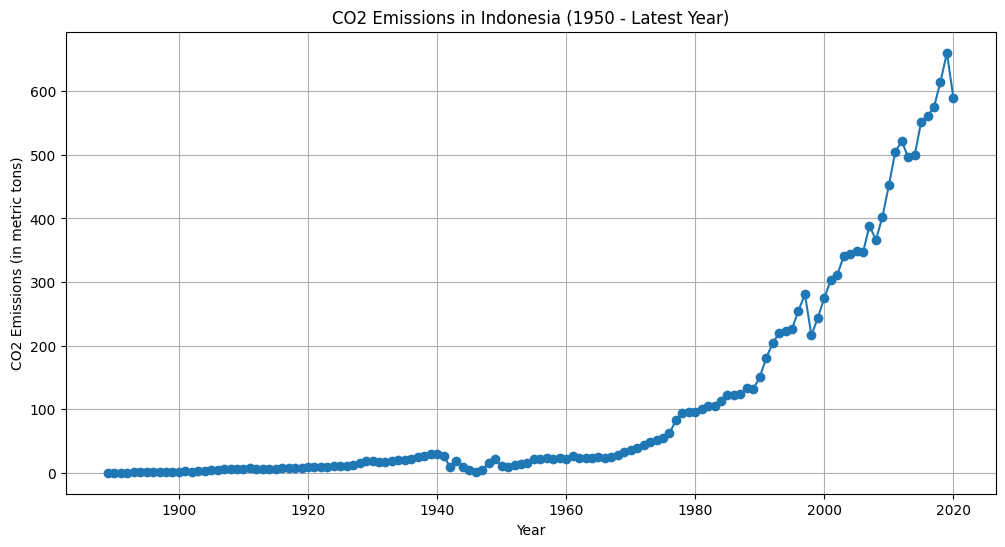

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df_main['year'], df_main['co2'], marker='o')
plt.title('CO2 Emissions in Indonesia (1950 - Latest Year)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (in metric tons)')
plt.grid()
plt.show()


sepertinya per tahun data emisi co2 terus meningkat signifikan, walaupun ada beberapa tahun tertentu yang terlihat turun


## Kualitas Data


### Missing Value


In [6]:
print("Missing values in dataset:")
print(df_main.isnull().sum())


Missing values in dataset:
year    0
co2     0
dtype: int64


Tidak ada missing value pada dataset ini


### Outlier


saya akan mencoba beberapa cara untuk mendeteksi outlier disini


1. Metode BoxPlot


Boxplot, juga dikenal sebagai box plot atau box-and-whisker plot, adalah cara standar untuk menampilkan distribusi kumpulan data berdasarkan ringkasan lima angka titik data: "minimum", kuartil pertama [Q1], median, kuartil ketiga [Q3] dan "maksimum". Berikut ini contohnya.


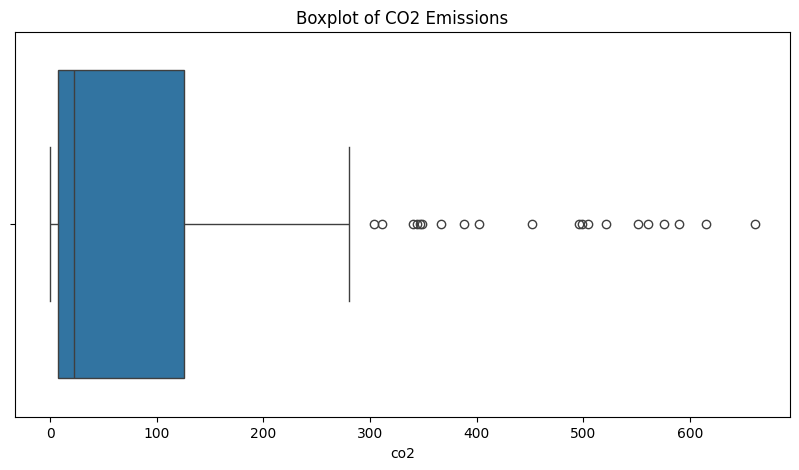

In [7]:
import seaborn as sns # type: ignore

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_main, x='co2')
plt.title('Boxplot of CO2 Emissions')
plt.show()


2. Dengan Z-Score


In [ ]:
# Hitung Z-Score
mean_co2 = df_main['co2'].mean()
std_co2 = df_main['co2'].std()

df_main['z_score'] = (df_main['co2'] - mean_co2) / std_co2

outliers_zscore = df_main[np.abs(df_main['z_score']) > 3]
print("Outliers detected (Z-Score):")
print(outliers_zscore)




Outliers detected (Z-Score):
     year      co2   z_score
129  2018  614.884  3.032750
130  2019  660.594  3.306829


3. Arima


Model ARIMA bekerja dengan membuat prediksi nilai-nilai masa depan (atau nilai yang ada) berdasarkan pola historis dalam data time series. Prediksi ini mencerminkan pola trend, seasonality, dan noise dalam data.

Outlier dapat diidentifikasi jika ada nilai aktual yang secara signifikan menyimpang dari nilai yang diprediksi oleh model ARIMA, yang berarti nilai tersebut tidak sesuai dengan pola yang dipelajari oleh model.


Residual sebagai Indikator Penyimpangan
Residuals didefinisikan sebagai selisih antara nilai aktual data (df_main['co2']) dan nilai yang diprediksi oleh model (fitted_values):

Residual= Nilai Aktual−Nilai yang Diprediksi

Jika model ARIMA telah dilatih dengan baik, maka residual seharusnya kecil dan mengikuti distribusi normal sekitar nilai nol (tidak bias).

Nilai residual yang sangat besar (di luar rentang normal) menunjukkan bahwa model ARIMA tidak dapat menjelaskan data tersebut, sehingga mengindikasikan outlier.


In [ ]:
from pmdarima import auto_arima # type: ignore


# Fit auto_arima model
auto_model = auto_arima(
    df_main['co2'],
    seasonal=True,
    stepwise=True,
    trace=True,
    suppress_warnings=True
)

fitted_values = auto_model.predict_in_sample()
residuals = df_main['co2'] - fitted_values
residual_mean = residuals.mean()
residual_std = residuals.std()
# Detect outliers: residuals greater than 3 times the standard deviation
outliers_autoarima = df_main[np.abs(residuals) > 3 * residual_std]
outliers_autoarima


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1156.954, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1140.989, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1083.981, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1084.909, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1082.511, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1082.650, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1072.318, Time=0.06 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=1062.239, Time=0.19 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=1070.406, Time=0.17 sec
 ARIMA(1,2,5)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(0,2,5)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=1071.259, Time=0

,year,co2,z_score
109,1998,215.971,0.640858
131,2020,589.500,2.880547


Dalam statistik, 3-standar deviasi (3σ) sering digunakan untuk mendeteksi data yang tidak wajar berdasarkan asumsi distribusi normal:


Outlier jika ∣Residual∣>3×Standard Deviation (σ)


## Uji stasioner


Kenapa saya menggunakan uji stasioner disini, karena saya juga ingin mencoba model arima nantinya selain model prediksi biasa


ADF (Augmented Dickey-Fuller) Statistic adalah ukuran statistik yang digunakan dalam ADF test, sebuah uji statistik untuk menentukan apakah suatu time series stasioner atau tidak. ADF statistic adalah nilai yang dihitung dari regresi yang digunakan dalam uji Dickey-Fuller yang diperluas, dengan menambahkan lag-lag dari variabel independen untuk mengatasi autokorelasi pada residual.


Stasioneritas adalah sifat penting dalam analisis time series, di mana statistik seperti rata-rata, varians, dan autokorelasi tidak berubah seiring waktu. Data yang tidak stasioner dapat menghasilkan hasil analisis yang menyesatkan dalam model statistik dan machine learning.


Uji Augmented Dickey-Fuller (ADF) adalah uji statistik yang digunakan untuk menentukan apakah suatu data deret waktu (time series) bersifat **stasioner**. Uji ini didasarkan pada model regresi berikut:

$$
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \sum_{i=1}^p \delta_i \Delta Y_{t-i} + \epsilon_t
$$

Keterangan:

$$
\Delta Y_t: \text{Selisih pertama (first difference) dari deret waktu, didefinisikan sebagai } Y_t - Y_{t-1}.
$$

$$
\alpha: \text{Konstanta (intercept).}
$$

$$
\beta t: \text{Komponen tren (opsional).}
$$

$$
\gamma Y_{t-1}: \text{Nilai lag dari deret waktu untuk menguji stasioneritas.}
$$

$$
\sum_{i=1}^p \delta_i \Delta Y_{t-i}: \text{Penjumlahan lag perbedaan (lag differencing terms) untuk mengatasi autokorelasi.}
$$

$$
\epsilon_t: \text{Residual (error term).}
$$

Hipotesis nol (\(H_0\)) dan hipotesis alternatif (\(H_1\)) dalam uji ADF adalah sebagai berikut:

- \(H_0\): Deret waktu memiliki akar unit (**non-stasioner**).
- \(H_1\): Deret waktu tidak memiliki akar unit (**stasioner**).

**Interpretasi:**

- Jika nilai statistik ADF lebih kecil daripada nilai kritis dari tabel Dickey-Fuller, maka \(H_0\) ditolak, dan deret waktu dianggap **stasioner**.
- Jika nilai statistik ADF lebih besar daripada nilai kritis, maka \(H_0\) gagal ditolak, dan deret waktu dianggap **non-stasioner**.


### Contoh uji stasioner manual


#### Uji Stasioneritas Menggunakan Uji ADF dan Perhitungan Manual

Uji stasioneritas bertujuan untuk menentukan apakah suatu data time series memiliki sifat yang konstan dalam hal rata-rata dan varians sepanjang waktu. Salah satu metode yang umum digunakan untuk uji stasioneritas adalah **Augmented Dickey-Fuller (ADF)** test. Selain itu, perhitungan manual juga dapat digunakan untuk memperkirakan model autoregressive (AR) berdasarkan persamaan differencing berikut:

$$
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \sum_{i=1}^p \delta_i \Delta Y_{t-i} + \epsilon_t
$$

### 1. Data

Data yang digunakan adalah data emisi CO2 yang tercatat dari tahun 1889 hingga 1893.

| Year | CO2   |
| ---- | ----- |
| 1889 | 0.004 |
| 1890 | 0.015 |
| 1891 | 0.022 |
| 1892 | 0.191 |
| 1893 | 0.403 |

#### 2. Menghitung Perubahan Nilai (Differencing)

Langkah pertama adalah menghitung perubahan nilai atau differencing untuk mendapatkan \(\Delta Y_t\). Perubahan nilai dihitung dengan rumus:

$$
\Delta Y_t = Y_t - Y_{t-1}
$$

Hasil perhitungan differencing adalah sebagai berikut:

| Year | CO2   | \(\Delta Y_t\)        |
| ---- | ----- | --------------------- |
| 1889 | 0.004 | -                     |
| 1890 | 0.015 | 0.015 - 0.004 = 0.011 |
| 1891 | 0.022 | 0.022 - 0.015 = 0.007 |
| 1892 | 0.191 | 0.191 - 0.022 = 0.169 |
| 1893 | 0.403 | 0.403 - 0.191 = 0.212 |

#### 3. Menyusun Model Autoregressive (AR)

Selanjutnya, kita akan menyusun model autoregressive berdasarkan lag 1 $$ \gamma Y\_{t-1} $$.

Model yang digunakan adalah:

$$
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \epsilon_t
$$

#### 3.1. Menambahkan Variabel Waktu \(t\)

Untuk memasukkan komponen waktu (\(t\)) dalam model, kita perlu membuat variabel waktu berdasarkan tahun. Variabel \(t\) dihitung dengan cara mengurangi tahun dengan tahun pertama (1889):

| Year | CO2   | \(t\) |
| ---- | ----- | ----- |
| 1889 | 0.004 | 0     |
| 1890 | 0.015 | 1     |
| 1891 | 0.022 | 2     |
| 1892 | 0.191 | 3     |
| 1893 | 0.403 | 4     |

#### 3.2. Menambahkan Variabel Lag

$$ \gamma Y\_{t-1} $$

Lag adalah nilai CO2 pada tahun sebelumnya. Kita menambahkan kolom \(Y\_{t-1}\) yang merupakan nilai CO2 pada tahun sebelumnya:

| Year | CO2   | \(Y\_{t-1}\) |
| ---- | ----- | ------------ |
| 1889 | 0.004 | -            |
| 1890 | 0.015 | 0.004        |
| 1891 | 0.022 | 0.015        |
| 1892 | 0.191 | 0.022        |
| 1893 | 0.403 | 0.191        |

#### 4. Menyusun Persamaan Regresi Linier

Selanjutnya, kita akan menyusun persamaan regresi linier untuk menghitung koefisien \(\alpha\), \(\beta\), dan \(\gamma\). Persamaan regresi yang digunakan adalah:

$$
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \epsilon_t
$$

Dengan data yang telah disusun, kita akan melakukan perhitungan regresi linier menggunakan **metode kuadrat terkecil** (least squares method). Untuk persamaan linier ini, kita akan menghitung nilai untuk \(\alpha\), \(\beta\), dan \(\gamma\) secara manual dengan mengikuti langkah-langkah berikut:

#### 4.1. Menyusun Matriks Desain

Matriks desain untuk regresi linier adalah matriks yang memuat nilai variabel bebas \(t\) dan \(Y\_{t-1}\), serta konstanta untuk menghitung \(\alpha\).

| Const | \(t\) | \(Y\_{t-1}\) | \(\Delta Y_t\) |
| ----- | ----- | ------------ | -------------- |
| 1     | 0     | -            | -              |
| 1     | 1     | 0.004        | 0.011          |
| 1     | 2     | 0.015        | 0.007          |
| 1     | 3     | 0.022        | 0.169          |
| 1     | 4     | 0.191        | 0.212          |

**Catatan:** Kolom "Const" diisi dengan angka 1 untuk konstanta \(\alpha\).

#### 4.2. Menghitung Koefisien Regresi

Sekarang, kita akan menghitung koefisien \(\alpha\), \(\beta\), dan \(\gamma\) menggunakan rumus regresi linier klasik. Karena regresi linier melibatkan sistem persamaan, kita akan menyelesaikan sistem ini dengan metode **kuadrat terkecil**. Secara umum, langkah-langkah perhitungannya adalah:

1. Menyusun matriks desain \(X\) dan vektor target \(Y\),
2. Menghitung matriks transpos \(X^T\) dan hasil perkaliannya dengan \(X\),
3. Menghitung hasil perkalian \(X^T \cdot Y\),
4. Menyelesaikan persamaan matriks untuk mendapatkan koefisien \(\alpha\), \(\beta\), dan \(\gamma\).

Namun, karena perhitungan manual yang melibatkan matriks dan invers cukup rumit, biasanya langkah ini dilakukan menggunakan perangkat lunak statistik atau kalkulator matriks. Jika Anda melanjutkan secara manual, Anda perlu menyusun sistem persamaan dan menyelesaikannya.

#### 4.3. Hasil Regresi

Setelah melakukan regresi linier, Anda akan mendapatkan nilai untuk \(\alpha\), \(\beta\), dan \(\gamma\), yang kemudian dapat dimasukkan ke dalam persamaan regresi:

$$
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \epsilon_t
$$

#### 5. Menginterpretasikan Hasil Uji Stasioneritas

Setelah menghitung koefisien \(\alpha\), \(\beta\), dan \(\gamma\), Anda dapat menggunakan uji ADF untuk menguji apakah data time series Anda stasioner. Uji ADF memberikan nilai statistik uji dan p-value, yang dapat digunakan untuk memutuskan apakah data tersebut stasioner atau tidak:

- Jika p-value > 0.05, data tidak stasioner.
- Jika p-value < 0.05, data stasioner.


In [10]:
from statsmodels.tsa.stattools import adfuller # type: ignore

# Uji ADF
result = adfuller(df_main['co2'].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] > 0.05:
    print("Data tidak stasioner.")
else:
    print("Data sudah stasioner.")


ADF Statistic: 2.0058563810341896
p-value: 0.9986805127735741
Critical Values: {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Data tidak stasioner.


P-value dibandingkan dengan tingkat signifikansi 5% (0.05). Jika p-value lebih besar dari 0.05, maka hipotesis nol (𝐻0) tidak ditolak, yang berarti data dianggap tidak stasioner.
Jika p-value lebih kecil dari 0.05, hipotesis nol (𝐻0) ditolak, sehingga data dianggap stasioner.


# Data prepocessing


## interpolasi outlier


disini karena saya menemukan outlier sebelumnya, saya akan mengubah nilainya berdasarkan rumus interpolasi


$$
f(x) = f(x_0) + \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot (x - x_0)
$$


Penjelasan :

- \( x_0, x_1 \): Titik-titik data pada sumbu \( x \) yang diketahui.
- \( f(x_0), f(x_1) \): Nilai fungsi di \( x_0 \) dan \( x_1 \).
- \( x \): Titik yang ingin diinterpolasi (di antara \( x_0 \) dan \( x_1 \)).
- \( f(x) \): Nilai interpolasi pada \( x \).


In [ ]:
df_main.loc[109, 'co2'] = np.nan  
df_main.loc[131, 'co2'] = np.nan

In [ ]:
print("Sebelum perubahan:", df_main.loc[[109,131], 'co2'])
df_main['co2'] = df_main['co2'].interpolate(method='linear')

print("Sesudah perubahan:", df_main.loc[[109,131], 'co2'])


Sebelum perubahan: 109   NaN
131   NaN
Name: co2, dtype: float64
Sesudah perubahan: 109    262.342
131    660.594
Name: co2, dtype: float64


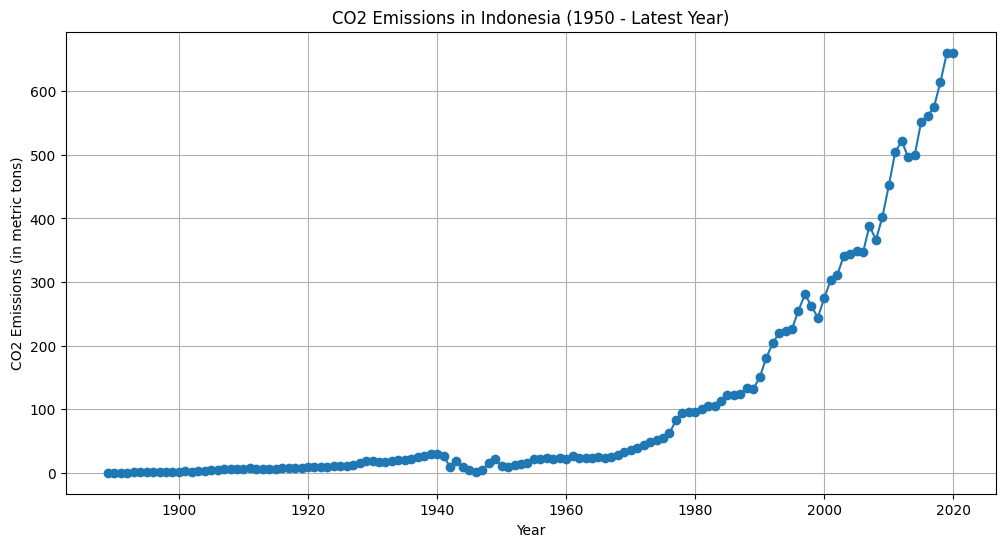

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_main['year'], df_main['co2'], marker='o')
plt.title('CO2 Emissions in Indonesia (1950 - Latest Year)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (in metric tons)')
plt.grid()
plt.show()

## Stasionerisasi data untuk model arima sarima


Differencing adalah metode sederhana untuk membuat data stasioner dengan menghitung perbedaan antara nilai saat ini (𝑌𝑡) dan nilai sebelumnya (𝑌𝑡−1).


Stasionerisasi Data dengan Differencing

1. Pengertian Stasionerisasi Data
   Stasionerisasi data adalah proses transformasi data time series menjadi bentuk yang stasioner, yaitu data yang memiliki rata-rata, varians, dan kovarians yang konstan sepanjang waktu. Data yang stasioner sangat penting dalam analisis time series, terutama untuk model-model statistik seperti ARIMA (Autoregressive Integrated Moving Average).

Salah satu cara untuk membuat data menjadi stasioner adalah dengan melakukan **differencing**, yang merupakan proses menghitung selisih antara nilai data pada waktu \(t\) dan waktu \(t-1\). Jika data tidak stasioner (misalnya ada tren), differencing dapat membantu menghilangkan tren tersebut.

Proses differencing dilakukan dengan rumus:

$$
\Delta Y_t = Y_t - Y_{t-1}
$$

Dimana:

- \(Y_t\) adalah nilai data pada waktu \(t\),
- \(Y\_{t-1}\) adalah nilai data pada waktu sebelumnya (t-1),
- \(\Delta Y*t\) adalah perubahan (differencing) antara nilai \(Y_t\) dan \(Y*{t-1}\).

2. Langkah-langkah Stasionerisasi Data

2.1. Perhitungan Manual Differencing
Misalkan kita memiliki data CO2 yang tercatat setiap tahun sebagai berikut:

| Year | CO2   |
| ---- | ----- |
| 1889 | 0.004 |
| 1890 | 0.015 |
| 1891 | 0.022 |
| 1892 | 0.191 |
| 1893 | 0.403 |

Untuk melakukan differencing, kita hitung perubahan nilai CO2 dari satu tahun ke tahun berikutnya menggunakan rumus:

$$
\Delta Y_t = Y_t - Y_{t-1}
$$

| Year | CO2   | \(\Delta Y*t = Y_t - Y*{t-1}\) |
| ---- | ----- | ------------------------------ |
| 1889 | 0.004 | -                              |
| 1890 | 0.015 | 0.015 - 0.004 = 0.011          |
| 1891 | 0.022 | 0.022 - 0.015 = 0.007          |
| 1892 | 0.191 | 0.191 - 0.022 = 0.169          |
| 1893 | 0.403 | 0.403 - 0.191 = 0.212          |

Dari tabel di atas, kita memperoleh **data yang sudah ter-stasionerkan** (differenced data).


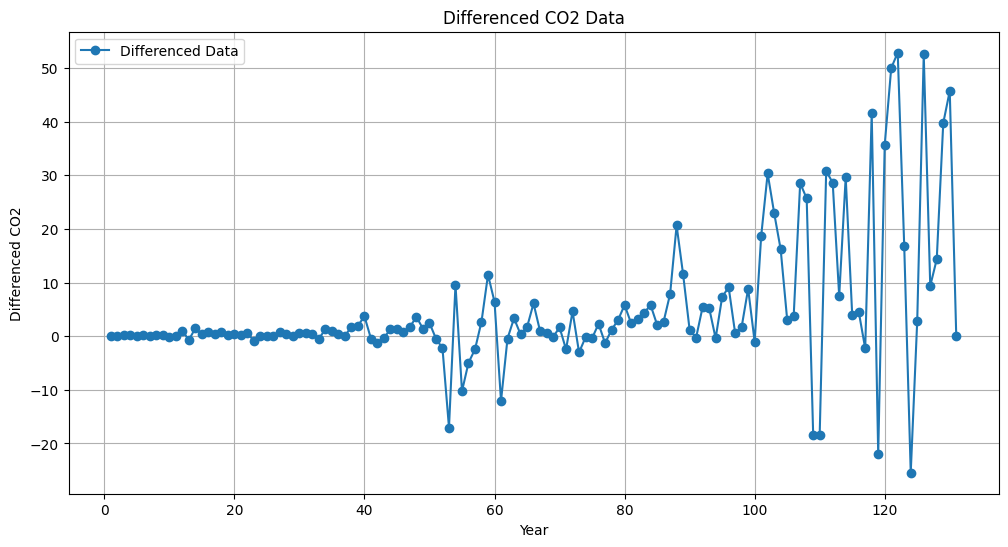

In [14]:
df_main['co2_diff'] = df_main['co2'].diff()

# Plot data setelah differencing

plt.figure(figsize=(12, 6))
plt.plot(df_main['co2_diff'], marker='o', label='Differenced Data')
plt.title('Differenced CO2 Data')
plt.xlabel('Year')
plt.ylabel('Differenced CO2')
plt.legend()
plt.grid()
plt.show()


In [15]:
result_diff = adfuller(df_main['co2_diff'].dropna())

print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])
print("Critical Values (Differenced):", result_diff[4])

if result_diff[1] > 0.05:
    print("Data setelah differencing masih tidak stasioner.")
else:
    print("Data setelah differencing sudah stasioner.")


ADF Statistic (Differenced): 1.055366761995386
p-value (Differenced): 0.9948171036738845
Critical Values (Differenced): {'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}
Data setelah differencing masih tidak stasioner.


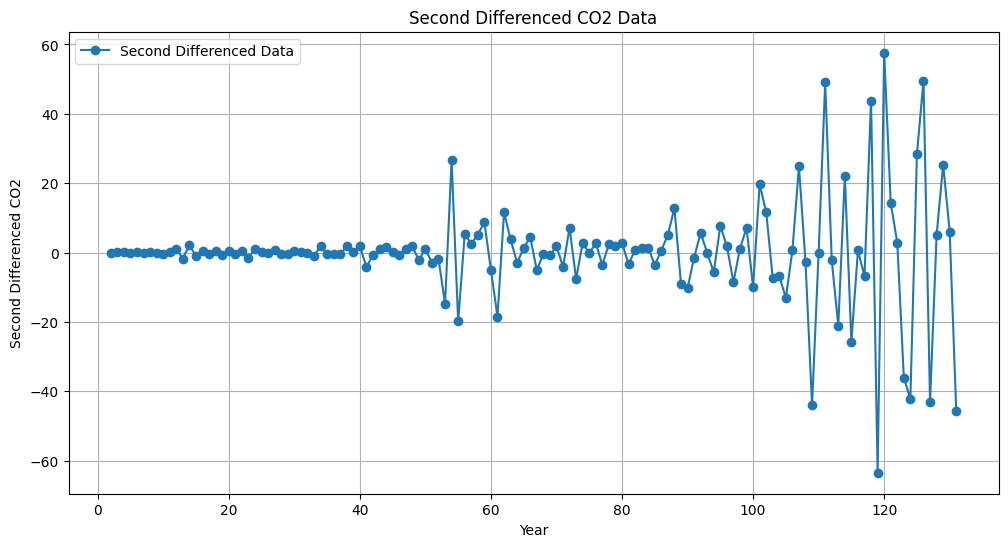

ADF Statistic (Second Differenced): -5.323172897103839
p-value (Second Differenced): 4.901812975543979e-06
Critical Values (Second Differenced): {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}
Data setelah differencing kedua sudah stasioner.


In [16]:
# Differencing kedua
df_main['co2_diff2'] = df_main['co2_diff'].diff()

# Plot data differencing kedua
plt.figure(figsize=(12, 6))
plt.plot(df_main['co2_diff2'], marker='o', label='Second Differenced Data')
plt.title('Second Differenced CO2 Data')
plt.xlabel('Year')
plt.ylabel('Second Differenced CO2')
plt.legend()
plt.grid()
plt.show()


result_diff2 = adfuller(df_main['co2_diff2'].dropna())

print("ADF Statistic (Second Differenced):", result_diff2[0])
print("p-value (Second Differenced):", result_diff2[1])
print("Critical Values (Second Differenced):", result_diff2[4])

if result_diff2[1] > 0.05:
    print("Data setelah differencing kedua masih tidak stasioner.")
else:
    print("Data setelah differencing kedua sudah stasioner.")


In [17]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       132 non-null    int64  
 1   co2        132 non-null    float64
 2   z_score    132 non-null    float64
 3   co2_diff   131 non-null    float64
 4   co2_diff2  130 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.3 KB


## Sliding Windows Time Series untuk selain arima


untuk model selain Arima sarima karena data ini univariate saya menggunakan sliding windows timeseries untuk menciptakan data supervised dengan 3 lag tahun sebelumnya sebagai fitur


In [18]:
window_size = 3 


for i in range(1, window_size + 1):
    df_main[f'lag_{i}'] = df_main['co2'].shift(i)


df_main_lagged = df_main.dropna()
# Tampilkan dataset baru
df_main_lagged


,year,co2,z_score,co2_diff,co2_diff2,lag_1,lag_2,lag_3
3,1892,0.191,-0.652965,0.169,0.162,0.022,0.015,0.004
4,1893,0.403,-0.651693,0.212,0.043,0.191,0.022,0.015
5,1894,0.480,-0.651232,0.077,-0.135,0.403,0.191,0.022
6,1895,0.769,-0.649499,0.289,0.212,0.480,0.403,0.191
7,1896,0.861,-0.648947,0.092,-0.197,0.769,0.480,0.403
...,...,...,...,...,...,...,...,...
127,2016,560.846,2.708737,9.371,-43.131,551.475,498.973,496.074
128,2017,575.176,2.794660,14.330,4.959,560.846,551.475,498.973
129,2018,614.884,3.032750,39.708,25.378,575.176,560.846,551.475
130,2019,660.594,3.306829,45.710,6.002,614.884,575.176,560.846


In [19]:
df_main_lagged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 3 to 131
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       129 non-null    int64  
 1   co2        129 non-null    float64
 2   z_score    129 non-null    float64
 3   co2_diff   129 non-null    float64
 4   co2_diff2  129 non-null    float64
 5   lag_1      129 non-null    float64
 6   lag_2      129 non-null    float64
 7   lag_3      129 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.1 KB


# Data Modelling


Disini saya split datanya menjadi 80% training dan 20% test


In [ ]:
from sklearn.model_selection import train_test_split # type: ignore


X = df_main_lagged[[f'lag_{i}' for i in range(1, window_size + 1)]]

y = df_main_lagged['co2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (103, 3)
Shape of y_train: (103,)


Disini saya menggunakan Mape dan RMSE sebagai akurasi model


MAPE (Mean Absolute Percentage Error)

Penjelasan
MAPE adalah metrik untuk mengevaluasi performa model prediksi dengan menghitung rata-rata kesalahan absolut dalam bentuk persentase terhadap nilai aktual.

Rumusnya:

$$
\text{MAPE} = \frac{1}{n} \sum\_{i=1}^{n} \left| \frac{y_i - \hat{y}\_i}{y_i} \right| \times 100\%
$$

Komponen:

- \( y_i \): Nilai aktual.
- \( \hat{y}\_i \): Nilai prediksi.
- \( n \): Jumlah data.

Contoh:
Misalkan kita memiliki data berikut:

| \(y_i\) (Aktual) | \(\hat{y}\_i\) (Prediksi) |
| ---------------- | ------------------------- |
| 100              | 110                       |
| 200              | 180                       |
| 300              | 310                       |

Langkah Perhitungan:

1. Hitung kesalahan absolut persentase:

   $$
   \text{Error}\_1 = \left| \frac{100 - 110}{100} \right| \times 100 = 10\%
   $$

   $$
   \text{Error}\_2 = \left| \frac{200 - 180}{200} \right| \times 100 = 10\%
   $$

   $$
   \text{Error}\_3 = \left| \frac{300 - 310}{300} \right| \times 100 = 3.33\%
   $$

2. Hitung rata-rata kesalahan absolut persentase:
   $$
   \text{MAPE} = \frac{10 + 10 + 3.33}{3} = 7.78\%
   $$

Hasil:
MAPE untuk data ini adalah **7.78%**.

---

RMSE (Root Mean Squared Error)

Penjelasan
RMSE adalah metrik yang mengukur akar rata-rata kesalahan kuadrat antara nilai aktual dan prediksi. RMSE sangat sensitif terhadap kesalahan besar, sehingga cocok digunakan jika kesalahan besar memiliki dampak signifikan.

Rumusnya:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum\_{i=1}^{n} (y_i - \hat{y}\_i)^2}
$$

Komponen:

- \( y_i \): Nilai aktual.
- \( \hat{y}\_i \): Nilai prediksi.
- \( n \): Jumlah data.

Contoh:
Menggunakan data yang sama seperti di atas:

| \(y_i\) (Aktual) | \(\hat{y}\_i\) (Prediksi) |
| ---------------- | ------------------------- |
| 100              | 110                       |
| 200              | 180                       |
| 300              | 310                       |

Langkah Perhitungan:

1. Hitung kesalahan kuadrat:

   $$
   \text{Error}\_1 = (100 - 110)^2 = 100
   $$

   $$
   \text{Error}\_2 = (200 - 180)^2 = 400
   $$

   $$
   \text{Error}\_3 = (300 - 310)^2 = 100
   $$

2. Hitung rata-rata kesalahan kuadrat:

   $$
   \text{Mean Squared Error (MSE)} = \frac{100 + 400 + 100}{3} = 200
   $$

3. Hitung akar kuadrat rata-rata:
   $$
   \text{RMSE} = \sqrt{200} = 14.14
   $$

Hasil:
RMSE untuk data ini adalah **14.14**.

---

Perbandingan MAPE dan RMSE

- **MAPE** memberikan kesalahan dalam bentuk persentase, sehingga lebih mudah dipahami dalam konteks bisnis.
- **RMSE** lebih sensitif terhadap kesalahan besar, sehingga baik untuk mendeteksi model dengan prediksi buruk pada data tertentu.

Keduanya dapat digunakan bersamaan untuk mengevaluasi performa model prediksi.


## Linear Regression


Linear Regression

Penjelasan
Linear regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara satu atau lebih variabel independen (\(x\)) dan variabel dependen (\(y\)) dengan menggunakan persamaan garis lurus.

Model regresi linier sederhana dapat dinyatakan sebagai:

$$
y = mx + b
$$

atau dalam bentuk yang lebih umum:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Komponen:

- \( y \): Variabel dependen (target atau output).
- \( x \): Variabel independen (prediktor atau input).
- \( \beta_0 \): Intersep (nilai \( y \) saat \( x = 0 \)).
- \( \beta_1 \): Koefisien kemiringan (slope) yang menunjukkan seberapa besar \( y \) berubah untuk setiap unit perubahan \( x \).
- \( \epsilon \): Galat (error) atau noise, yaitu deviasi nilai aktual dari nilai prediksi.

Rumus Koefisien
Untuk regresi linier sederhana, koefisien kemiringan (\( \beta_1 \)) dan intersep (\( \beta_0 \)) dapat dihitung dengan rumus berikut:

$$
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

Contoh:
Misalkan kita memiliki data berikut:

| \(x\) | \(y\) |
| ----- | ----- |
| 1     | 2     |
| 2     | 3     |
| 3     | 5     |

Langkah 1: Hitung Mean

$$
\bar{x} = \frac{1 + 2 + 3}{3} = 2, \quad \bar{y} = \frac{2 + 3 + 5}{3} = 3.33
$$

Langkah 2: Hitung \(\beta_1\)

$$
\beta_1 = \frac{(1 - 2)(2 - 3.33) + (2 - 2)(3 - 3.33) + (3 - 2)(5 - 3.33)}{(1 - 2)^2 + (2 - 2)^2 + (3 - 2)^2}
$$

$$
\beta_1 = \frac{(-1)(-1.33) + (0)(-0.33) + (1)(1.67)}{1 + 0 + 1}
$$

$$
\beta_1 = \frac{1.33 + 0 + 1.67}{2} = 1.5
$$

Langkah 3: Hitung \(\beta_0\)

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

$$
\beta_0 = 3.33 - (1.5)(2) = 0.33
$$

Hasil:
Persamaan regresi linier:

$$
y = 1.5x + 0.33
$$

Interpretasi:

- Untuk setiap peningkatan \(x\) sebesar 1 unit, \(y\) meningkat sebesar 1.5 unit.
- Saat \(x = 0\), \(y\) diprediksi bernilai 0.33.


Dalam Code


RMSE: 12.429222773035779
MAPE: 16.03%


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


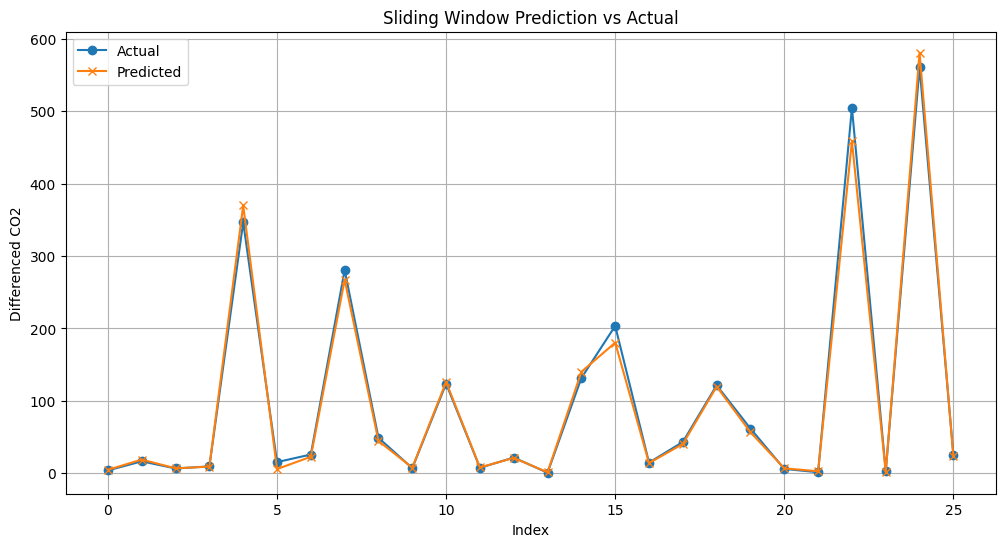

In [ ]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # type: ignore

# Inisialisasi dan fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi performa
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")



plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Sliding Window Prediction vs Actual")
plt.xlabel("Index")
plt.ylabel("Differenced CO2")
plt.legend()
plt.grid()
plt.show()



## Ridge regression


Ridge Regression

Penjelasan
Ridge regression adalah teknik regresi linier yang digunakan untuk menangani multikolinieritas (hubungan linear tinggi antar variabel independen) dengan menambahkan penalti terhadap besar koefisien regresi. Tujuannya adalah untuk mengurangi overfitting dengan mengurangi kompleksitas model.

Ridge regression meminimalkan fungsi biaya berikut:

$$
J(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
$$

Komponen:

- \( y_i \): Nilai aktual.
- \( \hat{y}_i = \beta_0 + \sum_{j=1}^p \beta*j x*{ij} \): Prediksi berdasarkan koefisien \(\beta\).
- \( \lambda \): Parameter regulasi (juga disebut _regularization parameter_), menentukan seberapa besar penalti diterapkan.
  - \( \lambda = 0 \): Ridge regression sama seperti regresi linier biasa.
  - \( \lambda > 0 \): Menambahkan penalti, memperkecil koefisien untuk mencegah overfitting.
- \( \beta_j \): Koefisien regresi untuk fitur \(x_j\).
- \( p \): Jumlah fitur dalam model.

Rumus Koefisien dalam Ridge Regression
Ridge regression menghitung koefisien (\(\beta\)) menggunakan rumus berikut:

$$
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}
$$

Komponen:

- \( \mathbf{X} \): Matriks fitur (\(n \times p\)).
- \( \mathbf{y} \): Vektor target (\(n \times 1\)).
- \( \mathbf{I} \): Matriks identitas (\(p \times p\)).
- \( \lambda \): Parameter regulasi.

---

Contoh:
Misalkan kita memiliki data berikut:

| \(x_1\) | \(x_2\) | \(y\) |
| ------- | ------- | ----- |
| 1       | 2       | 5     |
| 2       | 3       | 7     |
| 3       | 4       | 9     |

Langkah-Langkah:

1. Bentuk matriks fitur (\(\mathbf{X}\)) dan target (\(\mathbf{y}\)):

   $$
   \mathbf{X} =
   \begin{bmatrix}
   1 & 2 \\
   2 & 3 \\
   3 & 4
   \end{bmatrix}, \quad
   \mathbf{y} =
   \begin{bmatrix}
   5 \\
   7 \\
   9
   \end{bmatrix}
   $$

2. Tentukan nilai regulasi (\(\lambda = 1\)).

3. Hitung koefisien dengan rumus:

   $$
   \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}
   $$

   Setelah substitusi dan perhitungan matriks, koefisien \(\beta_1\) dan \(\beta_2\) akan lebih kecil dibandingkan regresi linier biasa.

---

Interpretasi:

- Ridge regression mengurangi nilai koefisien (\(\beta\)), tetapi tidak mengatur koefisien menjadi nol (berbeda dengan Lasso Regression).
- Cocok untuk model dengan fitur yang memiliki hubungan tinggi atau multikolinieritas.


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression - RMSE: 12.42953465698351
Ridge Regression - MAPE: 16.03%


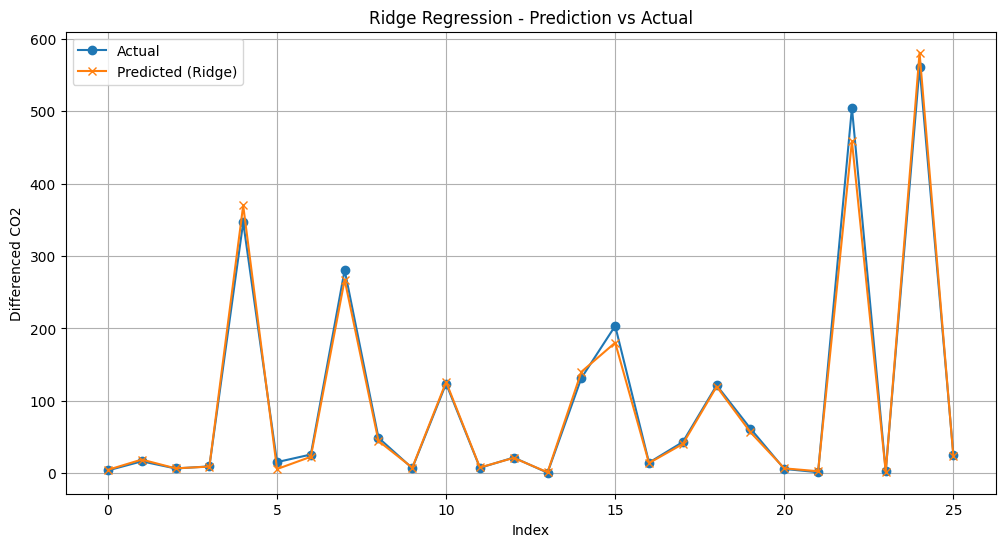

In [ ]:
from sklearn.linear_model import Ridge # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # type: ignore


# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Prediksi
y_pred_ridge = ridge_model.predict(X_test)

# Evaluasi performa
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {rmse_ridge}")
print(f"Ridge Regression - MAPE: {mape_ridge * 100:.2f}%")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_ridge, label="Predicted (Ridge)", marker='x')
plt.title("Ridge Regression - Prediction vs Actual")
plt.xlabel("Index")
plt.ylabel("Differenced CO2")
plt.legend()
plt.grid()
plt.show()


## Random Forest Regressor


Random Forest

Penjelasan
**Random Forest** adalah algoritma pembelajaran ensemble yang menggabungkan banyak _decision trees_ untuk membuat prediksi yang lebih akurat dan stabil. Ini digunakan untuk tugas regresi maupun klasifikasi.

Konsep Utama:

1. **Ensemble Learning**: Menggabungkan prediksi dari banyak model (dalam hal ini, decision trees) untuk meningkatkan akurasi.
2. **Bagging (Bootstrap Aggregating)**: Menggunakan subset acak dari data untuk melatih setiap decision tree.
3. **Random Feature Selection**: Setiap tree hanya mempertimbangkan subset fitur yang dipilih secara acak saat membuat split, sehingga menghasilkan variasi antar pohon.

Proses Random Forest:

1. Membuat _bootstrap samples_ dari data pelatihan (dengan penggantian).
2. Melatih setiap decision tree pada satu _bootstrap sample_.
3. Untuk prediksi:
   - **Klasifikasi**: Menggunakan _majority vote_ (prediksi yang paling sering muncul di antara semua pohon).
   - **Regresi**: Mengambil rata-rata prediksi dari semua pohon.

---

Rumus Utama
Untuk Klasifikasi:
Prediksi akhir diberikan oleh _majority vote_:

$$
\hat{y} = \text{mode} \{ T_1(x), T_2(x), \dots, T_k(x) \}
$$

- \( T_k(x) \): Prediksi dari pohon ke-\(k\).
- \(\text{mode}\): Nilai yang paling sering muncul di antara prediksi semua pohon.

Untuk Regresi:
Prediksi akhir diberikan oleh rata-rata prediksi semua pohon:

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} T_i(x)
$$

- \( T_k(x) \): Prediksi dari pohon ke-\(k\).
- \( k \): Jumlah pohon dalam hutan.

---

Contoh:
Misalkan kita memiliki dataset dengan fitur seperti **Jumlah Studi** dan **Nilai Ujian** untuk memprediksi apakah seorang siswa lulus atau tidak.

| Jam Studi | Nilai Ujian | Lulus (Ya/Tidak) |
| --------- | ----------- | ---------------- |
| 5         | 80          | Ya               |
| 2         | 50          | Tidak            |
| 3         | 60          | Ya               |
| 1         | 30          | Tidak            |
| 4         | 70          | Ya               |

1. **Bootstrap Sampling**:
   Buat subset acak dengan penggantian, misalnya:

   - Tree 1: Data ke-1, ke-2, ke-3.
   - Tree 2: Data ke-2, ke-4, ke-5.

2. **Latih Decision Trees**:
   Setiap pohon dilatih menggunakan subset yang berbeda dengan pemilihan fitur acak.

3. **Prediksi**:

   - Pohon 1: Prediksi "Ya".
   - Pohon 2: Prediksi "Tidak".
   - Pohon 3: Prediksi "Ya".

   Dengan _majority vote_, prediksi akhir adalah **"Ya"**.

Random Forest Regressor

Penjelasan
**Random Forest Regressor** adalah varian dari algoritma Random Forest yang digunakan untuk memprediksi nilai kontinu dalam tugas regresi. Sama seperti Random Forest untuk klasifikasi, algoritma ini bekerja dengan menggabungkan banyak _decision trees_ menggunakan teknik _bagging_ (bootstrap aggregating). Setiap pohon memberikan prediksi, dan prediksi akhir diperoleh dengan mengambil rata-rata prediksi dari semua pohon.

---

Rumus
Dalam regresi, prediksi akhir (\(\hat{y}\)) diberikan oleh rata-rata dari semua prediksi pohon (\(T_k(x)\)):

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} T_i(x)
$$

- \( T_k(x) \): Prediksi dari pohon ke-\(k\) untuk input \(x\).
- \( k \): Jumlah pohon dalam hutan.

Proses:

1. **Bootstrap Sampling**: Membuat subset acak dari data pelatihan dengan penggantian untuk melatih setiap decision tree.
2. **Random Feature Selection**: Setiap pohon hanya menggunakan subset fitur acak untuk membuat split.
3. **Prediksi**:
   - Setiap pohon memberikan prediksi untuk input data.
   - Rata-rata semua prediksi pohon diambil untuk menentukan hasil akhir.

---

Contoh:
Misalkan kita memiliki data berikut:

| Fitur 1 (Area) | Fitur 2 (Kamar) | Harga Rumah |
| -------------- | --------------- | ----------- |
| 120            | 3               | 500         |
| 150            | 4               | 600         |
| 200            | 5               | 750         |
| 100            | 2               | 400         |
| 180            | 4               | 700         |

Kita ingin memprediksi harga rumah untuk sebuah rumah dengan **Area = 130** dan **Kamar = 3**.

Langkah:

1. **Bootstrap Sampling**:
   - Pohon 1 dilatih dengan data ke-1, ke-2, dan ke-3.
   - Pohon 2 dilatih dengan data ke-2, ke-4, dan ke-5.
2. **Latih Decision Trees**: Setiap pohon menghasilkan model regresi sederhana.
3. **Prediksi**:

   - Pohon 1 memprediksi: 520
   - Pohon 2 memprediksi: 530
   - Pohon 3 memprediksi: 500

   Prediksi akhir:

   $$
   \hat{y} = \frac{520 + 530 + 500}{3} = 516.67
   $$


dalam code


Random Forest - RMSE: 15.70846255600932
Random Forest - MAPE: 11.11%


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


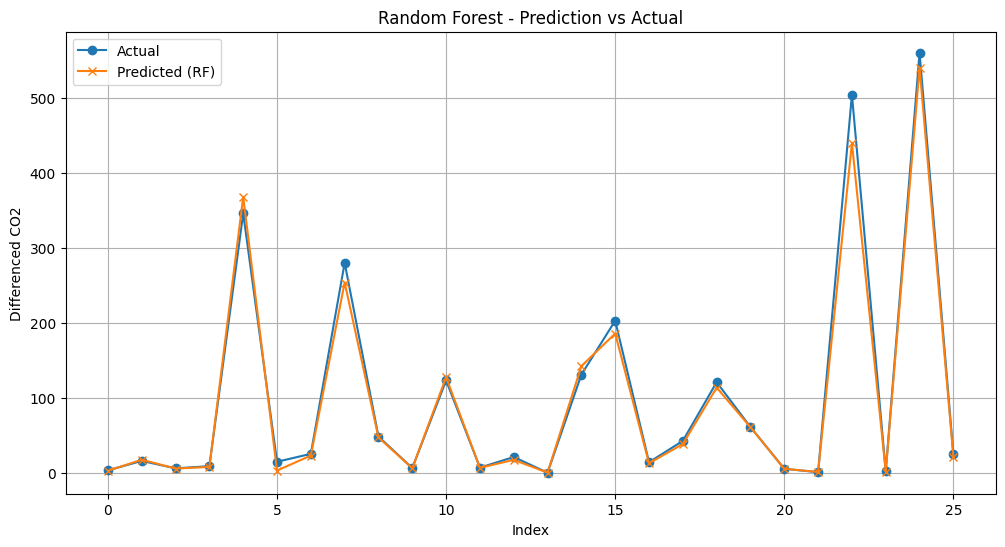

In [ ]:
from sklearn.ensemble import RandomForestRegressor # type: ignore

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi performa
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - MAPE: {mape_rf * 100:.2f}%")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_rf, label="Predicted (RF)", marker='x')
plt.title("Random Forest - Prediction vs Actual")
plt.xlabel("Index")
plt.ylabel("Differenced CO2")
plt.legend()
plt.grid()
plt.show()


## SVR


Support Vector Regression (SVR)

Penjelasan
**Support Vector Regression (SVR)** adalah varian dari Support Vector Machine (SVM) yang digunakan untuk tugas regresi. SVR bertujuan untuk menemukan fungsi yang memprediksi nilai kontinu sambil menjaga deviasi dari nilai yang sebenarnya dalam batas tertentu (\(\epsilon\)).

Konsep Utama:

1. **Margin-Tube (\(\epsilon\))**: Nilai toleransi di mana prediksi dianggap "cukup dekat" dengan nilai aktual. SVR mencoba meminimalkan deviasi di luar margin ini.
2. **Support Vectors**: Hanya data yang berada di luar \(\epsilon\)-margin yang memengaruhi model. Data di dalam margin diabaikan.
3. **Regularization**: Parameter \(C\) mengontrol trade-off antara margin yang lebar dan kesalahan prediksi.

---

Rumus Utama
SVR menggunakan kernel untuk memetakan data ke ruang berdimensi tinggi dan meminimalkan fungsi berikut:

$$
\min \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n \left( \xi_i + \xi_i^* \right)
$$

Dengan batasan:

$$
\begin{aligned}
&y_i - (w^T \phi(x_i) + b) \leq \epsilon + \xi_i, \\
&(w^T \phi(x_i) + b) - y_i \leq \epsilon + \xi_i^*, \\
&\xi_i, \xi_i^* \geq 0,
\end{aligned}
$$

- \( w \): Vektor bobot.
- \( \phi(x) \): Fungsi kernel yang memetakan data ke ruang berdimensi tinggi.
- \( b \): Bias.
- \(\xi_i, \xi_i^\*\): Variabel slack untuk menangani data di luar margin.
- \(C\): Parameter regularisasi untuk mengontrol kesalahan.

Prediksi:

$$
\hat{y} = w^T \phi(x) + b
$$

---

Contoh
Misalkan kita memiliki dataset berikut untuk memprediksi harga rumah berdasarkan ukuran:

| Ukuran Rumah (m²) | Harga Rumah (Juta) |
| ----------------- | ------------------ |
| 50                | 300                |
| 70                | 400                |
| 100               | 600                |
| 150               | 900                |

Kita ingin memprediksi harga untuk rumah dengan ukuran 120 m².

Langkah:

1. Pilih kernel (contoh: linear, polynomial, RBF).
2. Tentukan nilai parameter \(C\) (regularisasi) dan \(\epsilon\) (margin toleransi).
3. Model SVR memetakan data ke ruang berdimensi tinggi, membangun margin, dan memprediksi nilai.

---

dalam code


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVR - RMSE: 155.28796788636907
SVR - MAPE: 245.66%


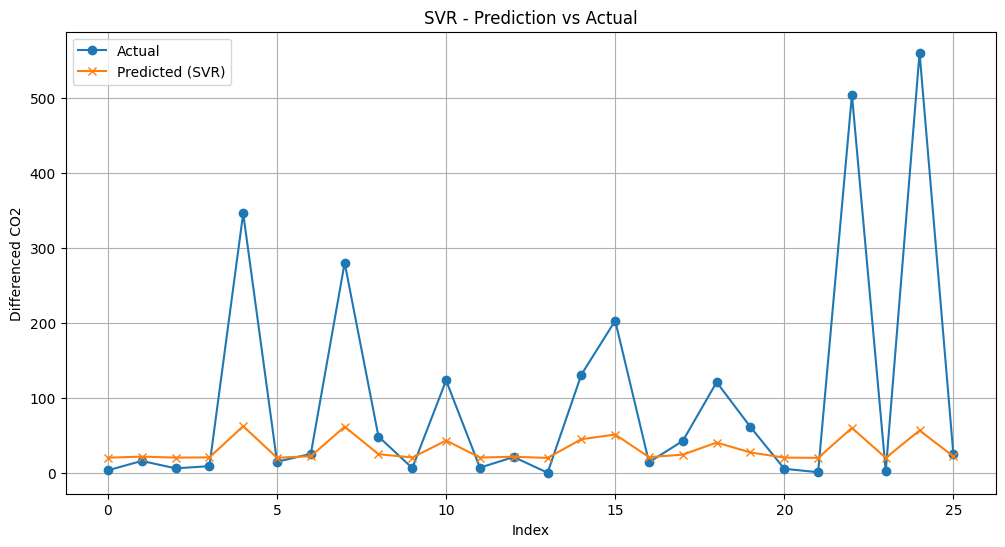

In [ ]:
from sklearn.svm import SVR # type: ignore

# Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Prediksi
y_pred_svr = svr_model.predict(X_test)

# Evaluasi performa
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print(f"SVR - RMSE: {rmse_svr}")
print(f"SVR - MAPE: {mape_svr * 100:.2f}%")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_svr, label="Predicted (SVR)", marker='x')
plt.title("SVR - Prediction vs Actual")
plt.xlabel("Index")
plt.ylabel("Differenced CO2")
plt.legend()
plt.grid()
plt.show()


## Multi layer perceptron


## Multi-Layer Perceptron (MLP)

Penjelasan
**Multi-Layer Perceptron (MLP)** adalah jenis jaringan saraf tiruan (artificial neural network) yang terdiri dari satu atau lebih lapisan tersembunyi antara lapisan input dan output. MLP termasuk dalam kategori jaringan saraf feedforward, di mana informasi hanya mengalir dalam satu arah: dari input ke output. MLP digunakan untuk tugas regresi dan klasifikasi.

MLP terdiri dari:

1. **Lapisan Input**: Lapisan pertama yang menerima data masukan.
2. **Lapisan Tersembunyi (Hidden Layer)**: Satu atau lebih lapisan di mana transformasi non-linear diterapkan pada data. Setiap neuron di lapisan tersembunyi menghubungkan inputnya dengan bobot tertentu dan menghasilkan output setelah aktivasi.
3. **Lapisan Output**: Lapisan terakhir yang menghasilkan prediksi atau kelas.
4. **Fungsi Aktivasi**: Fungsi non-linear seperti ReLU (Rectified Linear Unit) atau sigmoid yang diterapkan pada output neuron untuk memperkenalkan non-linearitas.

Proses pelatihan MLP menggunakan algoritma **backpropagation**, di mana kesalahan dihitung pada lapisan output dan kemudian disebarkan kembali ke lapisan-lapisan sebelumnya untuk memperbarui bobot dengan tujuan meminimalkan fungsi kerugian (loss function).

---

Rumus Utama

1. **Input ke Neuron**:

   $$
   z_j = \sum_{i} w_{ij} x_i + b_j
   $$

   - \( w\_{ij} \): Bobot yang menghubungkan input \(x_i\) ke neuron \(j\).
   - \( b_j \): Bias untuk neuron \(j\).
   - \( x_i \): Nilai input.

2. **Fungsi Aktivasi**:

   $$
   a_j = \sigma(z_j)
   $$

   - \( \sigma \): Fungsi aktivasi (misalnya, ReLU, sigmoid).
   - \( a_j \): Aktivasi neuron.

3. **Output dari Lapisan Tersembunyi**:
   Untuk setiap lapisan tersembunyi, neuron menghitung output berdasarkan input dan bobot yang dipelajari serta menerapkan fungsi aktivasi.

4. **Loss Function**:
   Untuk regresi, loss function sering menggunakan **Mean Squared Error (MSE)**:

   $$
   L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
   $$

   - \( y_i \): Nilai aktual.
   - \( \hat{y}\_i \): Prediksi oleh model.

5. **Backpropagation**:
   Algoritma untuk memperbarui bobot-bobot jaringan berdasarkan gradien dari fungsi kerugian terhadap bobot.

---

Contoh
Misalkan kita memiliki data berikut untuk memprediksi harga rumah berdasarkan ukuran rumah:

| Ukuran Rumah (m²) | Harga Rumah (Juta) |
| ----------------- | ------------------ |
| 50                | 300                |
| 70                | 400                |
| 100               | 600                |
| 150               | 900                |

Kita akan menggunakan **Multi-Layer Perceptron** untuk memprediksi harga rumah berdasarkan ukuran rumah.

#Langkah-langkah:

1. **Input Layer**: Ukuran rumah akan menjadi input untuk jaringan.
2. **Hidden Layer**: Proses transformasi non-linear menggunakan fungsi aktivasi seperti ReLU.
3. **Output Layer**: Prediksi harga rumah.

---

contoh code


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MLP Regressor - RMSE: 15.084772341934094
MLP Regressor - MAPE: 14.36%


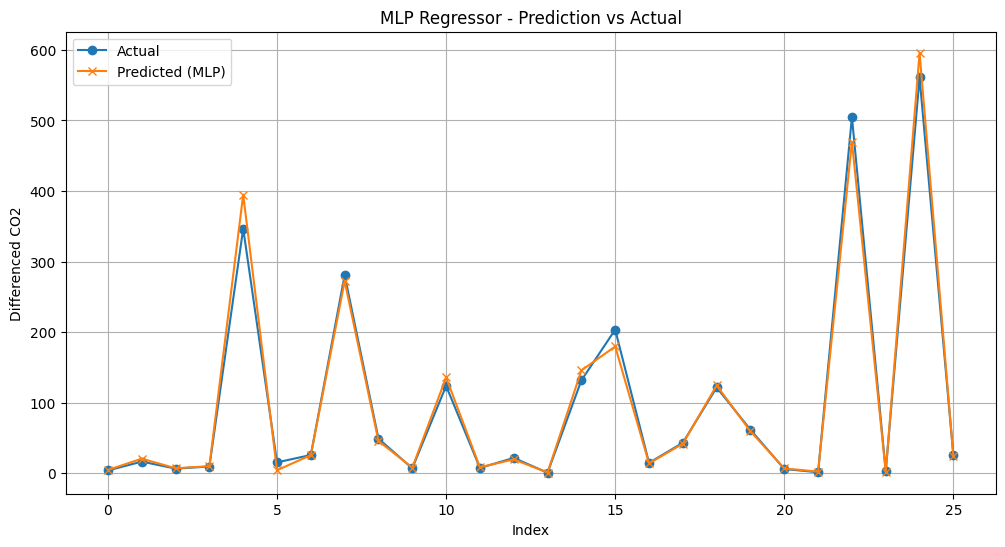

In [ ]:
from sklearn.neural_network import MLPRegressor # type: ignore

mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Prediksi
y_pred_mlp = mlp_model.predict(X_test)

# Evaluasi performa
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
mape_mlp = mean_absolute_percentage_error(y_test, y_pred_mlp)

print(f"MLP Regressor - RMSE: {rmse_mlp}")
print(f"MLP Regressor - MAPE: {mape_mlp * 100:.2f}%")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_mlp, label="Predicted (MLP)", marker='x')
plt.title("MLP Regressor - Prediction vs Actual")
plt.xlabel("Index")
plt.ylabel("Differenced CO2")
plt.legend()
plt.grid()
plt.show()


## Hasil Model selain Arima Sarima


| Model            | RMSE               | MAPE    |
| ---------------- | ------------------ | ------- |
| Linear           | 12.429222773035779 | 16.03%  |
| Ridge Regression | 12.42953465698351  | 16.03%  |
| Random Forest    | 15.70846255600932  | 11.11%  |
| SVR              | 155.28796788636907 | 245.66% |
| MLP Regressor    | 15.084772341934094 | 14.36%  |


# Percobaan dengan Arima Sarima


## Prediksi dengan model ARIMA


In [27]:
from pmdarima import auto_arima # type: ignore
from statsmodels.tsa.arima.model import ARIMA # type: ignore

def find_best_arima_model(data):
    model_auto = auto_arima(
        data.dropna(),  
        seasonal=False,
        stepwise=True,
        trace=True,
        suppress_warnings=True,
        max_order=10
    )
    return model_auto


best_arima_model = find_best_arima_model(df_main['co2_diff2'])

print(best_arima_model.summary())

p, d, q = best_arima_model.order
print(f"Optimal ARIMA parameters: p={p}, d={d}, q={q}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1003.243, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1082.379, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1072.486, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1016.054, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1017.099, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1005.104, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1000.971, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1004.701, Time=0.06 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1002.969, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1002.966, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1009.866, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1006.185, Time=0.07 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=999.035, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : A

### Penjelasan AIC dalam Model ARIMA

**AIC (Akaike Information Criterion)** adalah ukuran yang digunakan untuk mengevaluasi kualitas model statistik, termasuk model ARIMA. Dalam konteks ini, AIC digunakan untuk memilih model ARIMA terbaik dari sejumlah kandidat berdasarkan trade-off antara **kecocokan model** dan **kompleksitas model**.

#### Definisi Rumus:

AIC dihitung dengan rumus:

$$
\text{AIC} = 2k - 2 \ln(L)
$$

- \( k \): Jumlah parameter dalam model (termasuk konstanta, koefisien AR, MA, dll.).
- \( L \): Log-likelihood dari model (menunjukkan seberapa baik model cocok dengan data).

#### Interpretasi Nilai AIC:

1. Semakin kecil nilai AIC, semakin baik model tersebut.
2. AIC menyeimbangkan kecocokan model dengan penalti untuk jumlah parameter yang digunakan (mencegah overfitting).
3. AIC digunakan untuk membandingkan beberapa model: **model dengan AIC terendah adalah yang terbaik.**

#### Pemilihan Model Berdasarkan AIC:

Pada output Anda, model-model dengan nilai AIC berbeda diuji, dan model dengan AIC terendah dipilih:

| Model                    | AIC                    |
| ------------------------ | ---------------------- |
| ARIMA(2,0,2)             | 1003.243               |
| ARIMA(0,0,0)             | 1082.379               |
| ARIMA(3,0,2)             | 1000.971               |
| ARIMA(3,0,2) + intercept | **999.035** (terendah) |
| ARIMA(3,0,3)             | 1002.966               |

- **ARIMA(3,0,2) dengan intercept** memiliki nilai AIC **999.035**, yang merupakan nilai terendah.
- Oleh karena itu, **model ini dipilih sebagai model terbaik.**

#### Kesimpulan:

- **Model terbaik adalah ARIMA(3,0,2) dengan intercept (AIC = 999.035).**
- Nilai AIC membantu menghindari overfitting dengan penalti untuk model yang terlalu kompleks.
- Namun, AIC hanya satu metrik. Evaluasi tambahan, seperti pemeriksaan residual, uji stasioneritas, atau validasi terhadap data uji, diperlukan untuk memastikan kualitas prediksi.


In [28]:

def train_arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit


arima_model_fit = train_arima_model(df_main['co2_diff2'], order=(p, 2, 3))


print(arima_model_fit.summary())


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              co2_diff2   No. Observations:                  132
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -513.338
Date:                Thu, 05 Dec 2024   AIC                           1040.676
Time:                        20:10:31   BIC                           1060.749
Sample:                             0   HQIC                          1048.832
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0137      0.052      0.264      0.791      -0.088       0.116
ar.L2         -0.3503      0.055     -6.419      0.000      -0.457      -0.243
ar.L3         -0.1498      0.051     -2.949      0.0

e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Penjelasan Output Model SARIMAX (ARIMA(3, 0, 2))

## **1. Ringkasan Model**

- **Dep. Variable**: _co2_diff2_  
  Variabel dependen yang dimodelkan adalah `co2_diff2` (selisih kedua dari CO2).
- **No. Observations**: _132_  
  Ada 132 data observasi yang digunakan dalam fitting model.
- **Model**: _ARIMA(3, 0, 2)_  
  Model yang digunakan adalah ARIMA dengan 3 lag autoregressive (AR), 0 differencing (stasioneritas tidak diterapkan pada level variabel), dan 2 lag moving average (MA).
- **Log Likelihood**: _-492.517_  
  Log likelihood adalah ukuran kecocokan model. Nilai lebih tinggi (kurang negatif) menunjukkan model yang lebih baik.
- **AIC**: _999.035_  
  Akaike Information Criterion (AIC) digunakan untuk memilih model terbaik, dengan nilai lebih rendah menunjukkan model yang lebih baik.
- **BIC**: _1019.214_  
  Bayesian Information Criterion (BIC) mirip dengan AIC tetapi memberikan penalti lebih besar untuk model yang kompleks.
- **HQIC**: _1007.235_  
  Hannan-Quinn Information Criterion (HQIC) adalah metrik tambahan untuk mengevaluasi model.

---

## **2. Estimasi Parameter**

| Parameter  | Koefisien (\(\beta\)) | Std. Error | Z-Statistik | P>    | z                 |     | Interval Kepercayaan (95%) |
| ---------- | --------------------- | ---------- | ----------- | ----- | ----------------- | --- | -------------------------- |
| **const**  | 0.1707                | 0.086      | 1.991       | 0.046 | (0.003, 0.339)    |
| **ar.L1**  | -0.8098               | 0.098      | -8.267      | 0.000 | (-1.002, -0.618)  |
| **ar.L2**  | -0.3035               | 0.092      | -3.294      | 0.001 | (-0.484, -0.123)  |
| **ar.L3**  | -0.4265               | 0.062      | -6.857      | 0.000 | (-0.548, -0.305)  |
| **ma.L1**  | -0.0365               | 0.097      | -0.374      | 0.708 | (-0.228, 0.155)   |
| **ma.L2**  | -0.7746               | 0.110      | -7.025      | 0.000 | (-0.991, -0.558)  |
| **sigma²** | 111.8802              | 9.263      | 12.079      | 0.000 | (93.726, 130.035) |

### Penjelasan Parameter:

- **const (Konstanta)**: Nilai konstanta signifikan (\(p = 0.046\)), sehingga dapat disimpulkan bahwa terdapat rata-rata tetap dalam data.
- **ar.L1, ar.L2, ar.L3**: Komponen autoregressive (AR) menunjukkan dampak dari nilai lag (t-1, t-2, t-3) pada nilai saat ini. Ketiga parameter AR signifikan (\(p < 0.05\)), sehingga lag-lag ini berkontribusi pada prediksi.
- **ma.L1, ma.L2**: Komponen moving average (MA) mencakup dampak dari residual lagged. MA.L2 signifikan (\(p < 0.05\)), tetapi MA.L1 tidak signifikan (\(p = 0.708\)).
- **sigma²**: Varians residual signifikan, menunjukkan besarnya noise atau kesalahan dalam model.

---

## **3. Uji Diagnostik**

- **Ljung-Box (L1) (Q): 0.00, Prob(Q): 0.95**  
  Nilai probabilitas \(p = 0.95\) menunjukkan bahwa residual tidak memiliki autokorelasi yang signifikan (uji Ljung-Box tidak menolak hipotesis nol).
- **Jarque-Bera (JB): 101.66, Prob(JB): 0.00**  
  Nilai \(p = 0.00\) menunjukkan bahwa residual tidak berdistribusi normal (hipotesis nol ditolak).
- **Heteroskedasticity (H): 104.59, Prob(H): 0.00**  
  Uji menunjukkan heteroskedastisitas (variasi residual berubah-ubah). Hal ini mengindikasikan adanya variasi yang tidak konstan pada residual.
- **Skew: 0.00, Kurtosis: 7.30**  
  Residual memiliki kurtosis tinggi (lebih dari 3), menunjukkan distribusi heavy-tailed (leptokurtic).

---

## **4. Interpretasi**

- Model ARIMA(3, 0, 2) cukup baik dalam memodelkan data, dengan parameter AR signifikan dan satu parameter MA signifikan.
- Nilai AIC/BIC membantu memilih model terbaik, tetapi heteroskedastisitas dan distribusi residual menunjukkan kemungkinan perbaikan dengan model lain (misalnya, ARIMA dengan varians bersyarat seperti **GARCH**).
- Jika hasil prediksi kurang baik, bisa dicoba transformasi data lebih lanjut (seperti log transformasi) atau model alternatif.

---


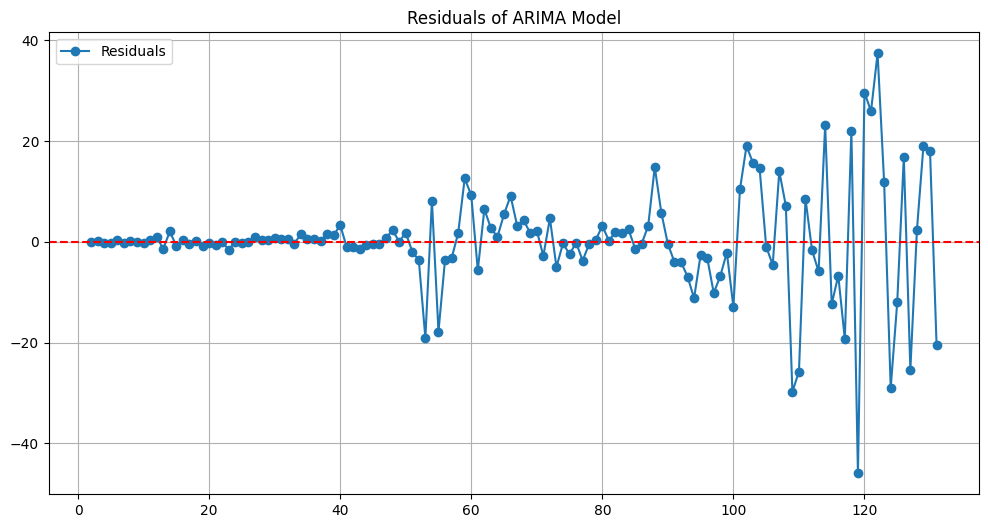

ADF Statistic (Residuals): -6.6718592132509835
p-value (Residuals): 4.5665756543474785e-09
Residuals sudah stasioner.


In [29]:

residuals = arima_model_fit.resid



plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of ARIMA Model')
plt.legend()
plt.grid()
plt.show()


from statsmodels.tsa.stattools import adfuller # type: ignore
result_residuals = adfuller(residuals.dropna())

print("ADF Statistic (Residuals):", result_residuals[0])
print("p-value (Residuals):", result_residuals[1])

if result_residuals[1] > 0.05:
    print("Residuals masih tidak stasioner.")
else:
    print("Residuals sudah stasioner.")


In [30]:
last_value_original = df_main['co2'].iloc[-1]  # Nilai terakhir dari data asli

last_value_diff1 = df_main['co2_diff'].iloc[-1]  # Nilai terakhir dari co2_diff (differencing pertama)
last_value_diff2 = df_main['co2_diff2'].iloc[-1]  # Nilai terakhir dari co2_diff2 (differencing kedua)

forecast_steps = 10
forecast = arima_model_fit.forecast(steps=forecast_steps)

forecast_undiff1 = forecast + last_value_diff2

forecast_undiff2 = forecast_undiff1 + last_value_diff1

forecast_undiff3 = forecast_undiff2 + last_value_original

print("Forecasted values after undifferencing:")
print(forecast_undiff3)


Forecasted values after undifferencing:
132    628.973833
133    631.297198
134    618.135503
135    608.194244
136    612.329873
137    617.849925
138    617.975501
139    615.433727
140    614.537668
141    615.406521
Name: predicted_mean, dtype: float64


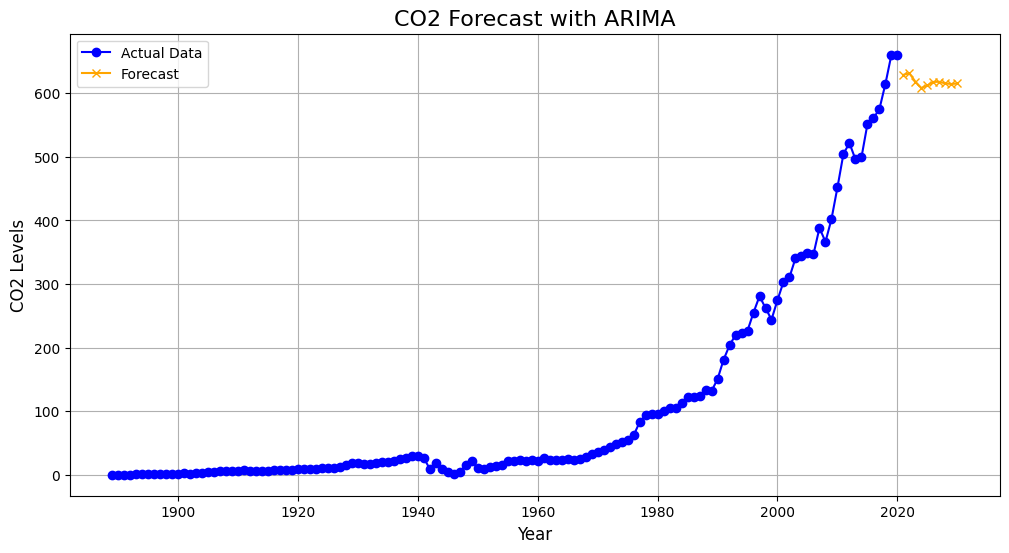

In [31]:
forecast_years = np.arange(df_main['year'].iloc[-1] + 1, df_main['year'].iloc[-1] + forecast_steps + 1)

plt.figure(figsize=(12, 6))

plt.plot(df_main['year'], df_main['co2'], label='Actual Data', marker='o', color='blue')

plt.plot(forecast_years, forecast_undiff3, label='Forecast', marker='x', color='orange')

plt.title('CO2 Forecast with ARIMA', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Levels', fontsize=12)

plt.legend()

plt.grid(True)

plt.show()

## Model SARIMA


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # type: ignore

# Model SARIMA
sarima_model = SARIMAX(df_main['co2'], order=(2, 2, 1), seasonal_order=(1, 1, 1, 12)) 
sarima_fit = sarima_model.fit()

# Residuals SARIMA
residuals_sarima = sarima_fit.resid

# Uji stasioneritas residual SARIMA
result_residuals_sarima = adfuller(residuals_sarima.dropna())

print("ADF Statistic (SARIMA Residuals):", result_residuals_sarima[0])
print("p-value (SARIMA Residuals):", result_residuals_sarima[1])

if result_residuals_sarima[1] > 0.05:
    print("Residuals SARIMA masih tidak stasioner.")
else:
    print("Residuals SARIMA sudah stasioner.")


ADF Statistic (SARIMA Residuals): -6.790644726778288
p-value (SARIMA Residuals): 2.3695386383678124e-09
Residuals SARIMA sudah stasioner.


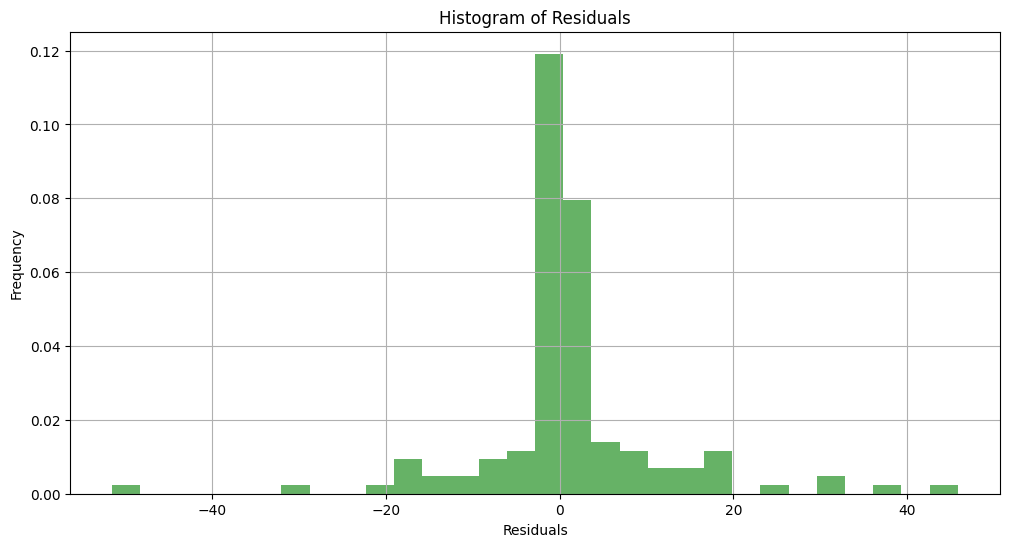

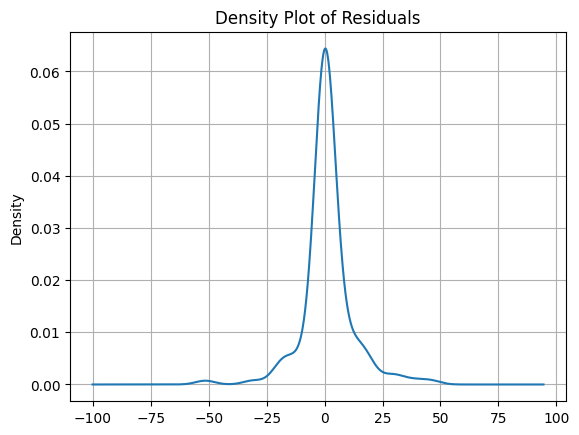

In [33]:


# Histogram residuals
plt.figure(figsize=(12, 6))
plt.hist(sarima_fit.resid, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Density plot
sarima_fit.resid.plot(kind='kde', title='Density Plot of Residuals')
plt.grid()
plt.show()


In [34]:
# Prediksi 10 langkah ke depan
forecast_steps = 10
forecast = sarima_fit.forecast(steps=forecast_steps)

# Cetak hasil prediksi
print("Forecasted values:")
print(forecast)


Forecasted values:
132    681.668326
133    706.864033
134    734.313123
135    760.538514
136    773.146602
137    791.817868
138    832.723167
139    852.281158
140    872.836576
141    896.488896
Name: predicted_mean, dtype: float64


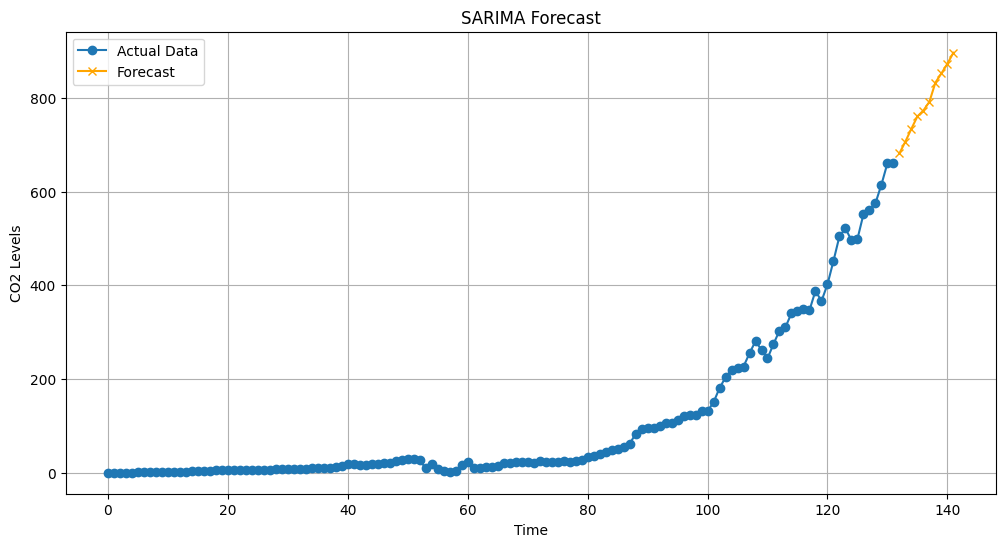

In [35]:
# Visualisasi prediksi
plt.figure(figsize=(12, 6))
plt.plot(df_main['co2'], label='Actual Data', marker='o')
plt.plot(range(len(df_main['co2']), len(df_main['co2']) + forecast_steps), forecast, label='Forecast', marker='x', color='orange')
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('CO2 Levels')
plt.legend()
plt.grid()
plt.show()


# Deployement


## Menyimpan model


model terbaik yang diambil adalah random forest regressor


In [36]:
import joblib

# Menyimpan model yang sudah dilatih
joblib.dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

## Website


https://huggingface.co/spaces/ahmadnoval/PSD-Co2-Emmision
